<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Minor Project/data/train.csv")

train.shape

(42000, 785)

In [3]:
X_train_all = (train.iloc[:, 1:].values).astype('float32') / 255 #all pixel values converted to feature matrix of 0 and 1

y_train_all = train.iloc[:, 0].values.astype('int32') #labels only.. target digits.


In [4]:
y_train_all = to_categorical(y_train_all) 

#converts to one hot encoder

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size = 0.10, random_state = 42)

In [6]:
X_train_image = np.reshape(X_train,(X_train.shape[0], 28, 28, 1))
X_test_image = np.reshape(X_test,(X_test.shape[0], 28, 28, 1))

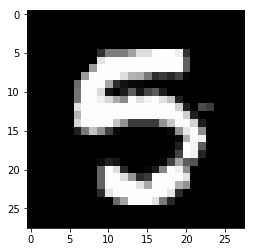

In [7]:
plt.imshow(X_train_image[1,:,:,0], cmap = "gray")
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3),
                 activation = "relu",
                 input_shape = (28,28,1),
                 strides = (2,2)
                ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten(name  = "flatten"))
model.add(Dense(10, activation="sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                11530     
Total params: 11,850
Trainable params: 11,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = "categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"]
             )

In [11]:
batch_size = 64
nb_epochs = 25

model_fitting = model.fit(X_train_image, y_train,
                          batch_size= batch_size,
                          epochs= nb_epochs,
                          verbose=2,
                          validation_data=(X_test_image, y_test),
                          initial_epoch= 0
                         )

Train on 37800 samples, validate on 4200 samples
Epoch 1/25
 - 3s - loss: 0.0408 - acc: 0.9879 - val_loss: 0.0776 - val_acc: 0.9745
Epoch 2/25
 - 3s - loss: 0.0386 - acc: 0.9887 - val_loss: 0.0780 - val_acc: 0.9736
Epoch 3/25
 - 3s - loss: 0.0378 - acc: 0.9892 - val_loss: 0.0833 - val_acc: 0.9752
Epoch 4/25
 - 3s - loss: 0.0362 - acc: 0.9895 - val_loss: 0.0779 - val_acc: 0.9755
Epoch 5/25
 - 3s - loss: 0.0349 - acc: 0.9905 - val_loss: 0.0864 - val_acc: 0.9736
Epoch 6/25
 - 3s - loss: 0.0338 - acc: 0.9900 - val_loss: 0.0817 - val_acc: 0.9736
Epoch 7/25
 - 3s - loss: 0.0327 - acc: 0.9908 - val_loss: 0.0830 - val_acc: 0.9755
Epoch 8/25
 - 3s - loss: 0.0320 - acc: 0.9910 - val_loss: 0.0745 - val_acc: 0.9750
Epoch 9/25
 - 3s - loss: 0.0308 - acc: 0.9907 - val_loss: 0.0819 - val_acc: 0.9738
Epoch 10/25
 - 3s - loss: 0.0295 - acc: 0.9917 - val_loss: 0.0790 - val_acc: 0.9762
Epoch 11/25
 - 3s - loss: 0.0285 - acc: 0.9922 - val_loss: 0.0803 - val_acc: 0.9755
Epoch 12/25
 - 3s - loss: 0.0276 - a

In [11]:
test = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Minor Project/data/test.csv")

In [12]:
X_testing = (test.values).astype("float32")/255

X_testing_image = np.reshape(X_testing, (X_testing.shape[0], 28, 28, 1))

In [13]:
pred_class = model.predict_classes(X_testing_image, verbose=0)

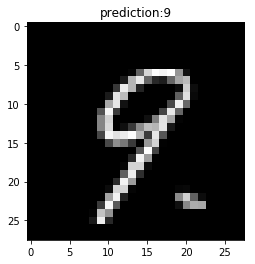

In [14]:
i=2
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()